# Data augmentation

Notebook to see data augmentation techniques on images from the ACDC dataset and CIFAR10 dataset.

To use them, set the flag `--data_aug` to 0 or 1 in the command line.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp -r drive/MyDrive/Tp4/* .

In [ ]:
!pip install -r requirements.txt

In [ ]:
cd src/

In [3]:
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
from torchvision import datasets
from src.manage.HDF5Dataset import HDF5Dataset

In [4]:
def show_images(img_1, img_transformed_1, img_2, img_transformed_2):
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=2)
    ax1[0].imshow(img_1)
    ax1[0].set_title('Original image')
    ax1[0].axis('off')

    ax1[1].imshow(img_transformed_1)
    ax1[1].set_title('Transformed image')
    ax1[1].axis('off')

    ax2[0].imshow(img_2)
    ax2[0].axis('off')

    ax2[1].imshow(img_transformed_2)
    ax2[1].axis('off')

    plt.show()

In [5]:
# Image from acdc
img_acdc = HDF5Dataset('train', '../data/ift780_acdc.hdf5')[0][0]

# Image from CIFAR10
img_cifar, _ = datasets.CIFAR10(root='../data')[6]

In [6]:
base_transform = transforms.Compose([transforms.ToTensor()])

## First transformation

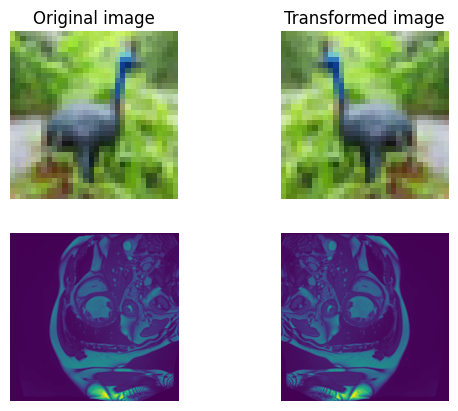

In [14]:
# To use this transformation, set '--data_aug=0'.

transform = transforms.Compose([
    base_transform,
    transforms.RandomHorizontalFlip(p=0.2),
    transforms.RandomPerspective(distortion_scale=0.1, p=0.2)
])

img_acdc_transformed = transform(img_acdc.numpy()).permute(1, 2, 0)
img_cifar_transformed = transform(img_cifar).permute(1, 2, 0)

show_images(img_cifar, img_cifar_transformed, img_acdc, img_acdc_transformed)

In [15]:
!python3 train.py --model=UNet --num-epoch=2 --data_aug=0

Checkpoints will NOT be saved!
Checkpoint file found!
Data augmentation 0 activated!
Training UNet on acdc for 2 epochs
Epoch: 1 of 2
100% 64/64 [01:18<00:00,  1.23s/it, Train loss=1.32, train_acc=0.023]
Validation loss 1.311
Validation accuracy 0.027
Epoch: 2 of 2
100% 64/64 [01:18<00:00,  1.23s/it, Train loss=1.19, train_acc=0.028]
Validation loss 1.138
Validation accuracy 0.029
Finished training.
Accuracy of the network on the test set: 3.466 %
Figure(1000x1000)
Figure(1000x1000)
Figure(1000x1000)
Figure(1000x500)


## Second transformation

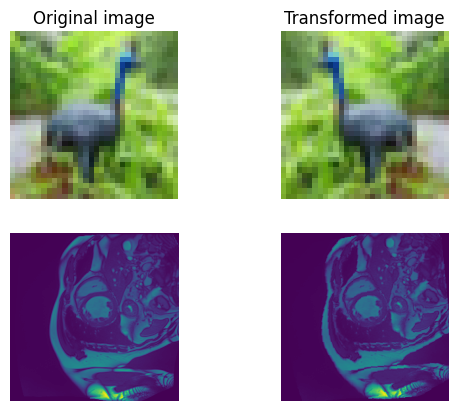

In [16]:
# To use this transformation, set '--data_aug=1'.

transform = transforms.Compose([
    base_transform,
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
])

img_acdc_transformed = transform(img_acdc.numpy()).permute(1, 2, 0)
img_cifar_transformed = transform(img_cifar).permute(1, 2, 0)

show_images(img_cifar, img_cifar_transformed, img_acdc, img_acdc_transformed)

In [17]:
!python3 train.py --model=UNet --num-epoch=2 --data_aug=1

Checkpoints will NOT be saved!
Checkpoint file found!
Data augmentation 1 activated!
Training UNet on acdc for 2 epochs
Epoch: 1 of 2
100% 64/64 [01:25<00:00,  1.33s/it, Train loss=1.33, train_acc=0.0227]
Validation loss 4.594
Validation accuracy 0.028
Epoch: 2 of 2
100% 64/64 [01:24<00:00,  1.32s/it, Train loss=1.19, train_acc=0.0285]
Validation loss 1.144
Validation accuracy 0.038
Finished training.
Accuracy of the network on the test set: 3.553 %
Figure(1000x1000)
Figure(1000x1000)
Figure(1000x1000)
Figure(1000x500)
